### This Notebook is a sandbox for SCE in a static Causal Hans Setting

#### Imports and Global Configurations

In [1]:
from dotenv import load_dotenv
load_dotenv()
import os
from IPython.display import Image
from CausalHansTSCE import CausalHansDataTSCE, CausalHansInterpreterTSCE
from TSCE.CausalNodeTSCE import CausalNodeTSCE
from TSCE.tree_helper import find_sequences
from Utils.load import load_dataset
from Utils.images import getDynDirImg, getTimeAsString, generateTreeImage, generateTreeImageAnt
from Utils.helper import find_valid_id

In [2]:
IMG_BASE_PATH = os.path.join("tmp_img", "TSCE")
os.makedirs(IMG_BASE_PATH, exist_ok=True)

#### Load Data and Prepare Data-Object for SCE (Selection Person to look at)

In [3]:
PATH_TO_DATA = os.path.join("tmp_data", "tsce_causalhans.pkl")
data = CausalHansDataTSCE(load_dataset(PATH_TO_DATA))
interpreter = CausalHansInterpreterTSCE(data)
cExamples= interpreter._get_valid_question_ts_and_person("Health", num=350)
print(f"Number found examples: {len(cExamples)}")

Number found examples: 350


In [4]:
print(cExamples[0])
print(data.get_person_at_ts(cExamples[0][1], cExamples[0][0]))
print(data.get_person_at_ts(cExamples[0][1]-1, cExamples[0][0]))

(2998, 50)
{'Age': 110.28126255235973, 'Nutrition': 51.35740161857359, 'Health': 8.91380985514725, 'Mobility': 4.644529767031501}
{'Age': 109.28126255235973, 'Nutrition': 50.69531999442377, 'Health': 9.057588952132694, 'Mobility': 4.848163345197788}


Trying to find a Changing Sequence. Consistent Sequence appear more often. Depending on the Distribution..

In [5]:
# fitting_ids = [] 
# for i in range(len(cExamples)):
#     cPerson ,cTs,  = cExamples[i]
#     cExpTree = interpreter.getExpTree(cPerson, cTs, "Health", max_depth=3)
#     cExplanations = interpreter.getExplanation(cExpTree)
#     if len(cExplanations) == 3:
#         fitting_ids.append(i)

# print(fitting_ids)     

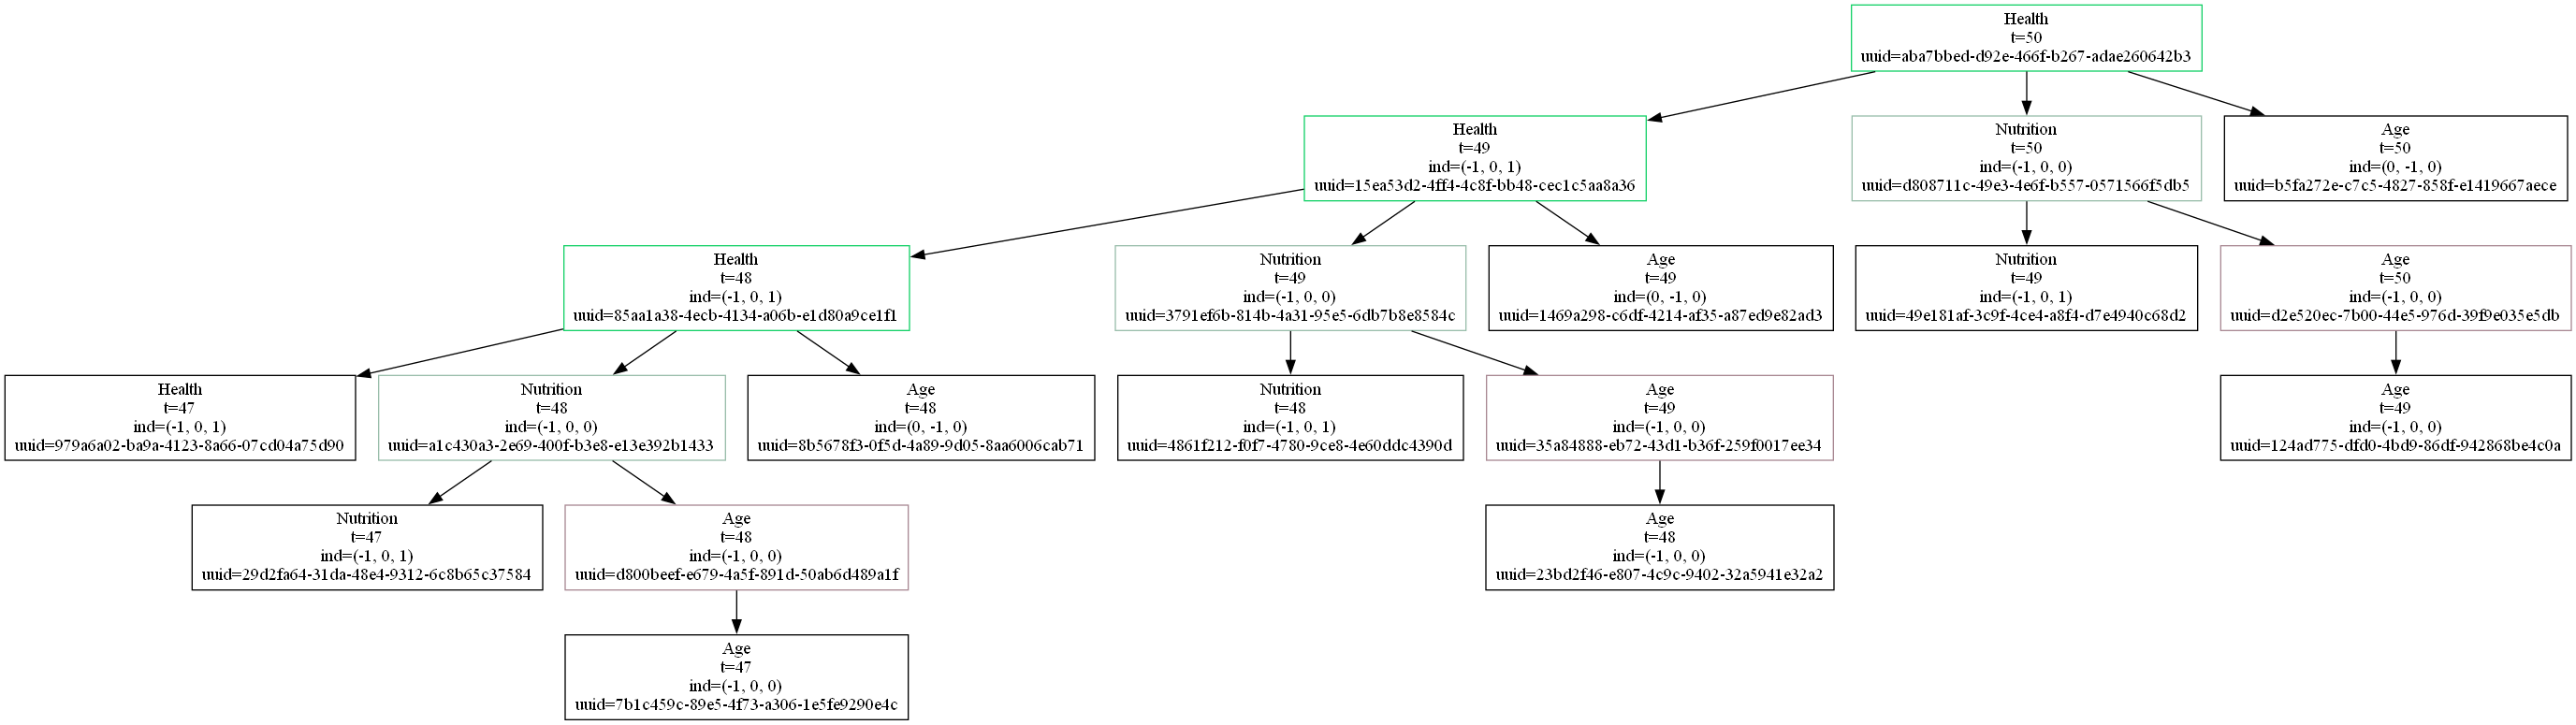

Hans Health constantly over the last 3 years was below average mostly because of his low Health continously 1 year before, because of his low Nutrition in the objected year, although his low Age in the objected year.

His Nutrition constantly over the last 3 years was below average mostly because of his low Nutrition continously 1 year before and because of his low Age in the objected year.

His Age constantly over the last 3 years was below average because of his low Age continously 1 year before.



In [6]:

cPerson ,cTs,  = cExamples[2] #cExamples[fitting_ids[1]]
cExpTree = interpreter.getExpTree(cPerson, cTs, "Health", max_depth=3)

filepath = os.path.join("tmp_img", "TSCE",  f"tssce_{getTimeAsString()}.png")
generateTreeImage(cExpTree, filepath=filepath)
display(Image(filename=filepath))

cExplanations = interpreter.getExplanation(cExpTree)
for cExplanation in list(cExplanations):
    print(cExplanation)
    print() 

### Extra: We can work on Anticipative Explanation Trees

In [7]:
# fitting_ids = [] 
# for i in range(len(cExamples)):
#     cPerson ,cTs,  = cExamples[i]
#     cExpTree = interpreter.getExpTreeAnticipative(cPerson, cTs, "Health", max_depth=3)
#     cExplanations = interpreter.getExplanationAnticipative(cExpTree)
#     if len(cExplanations) == 2:
#         fitting_ids.append(i)

# print(fitting_ids)     

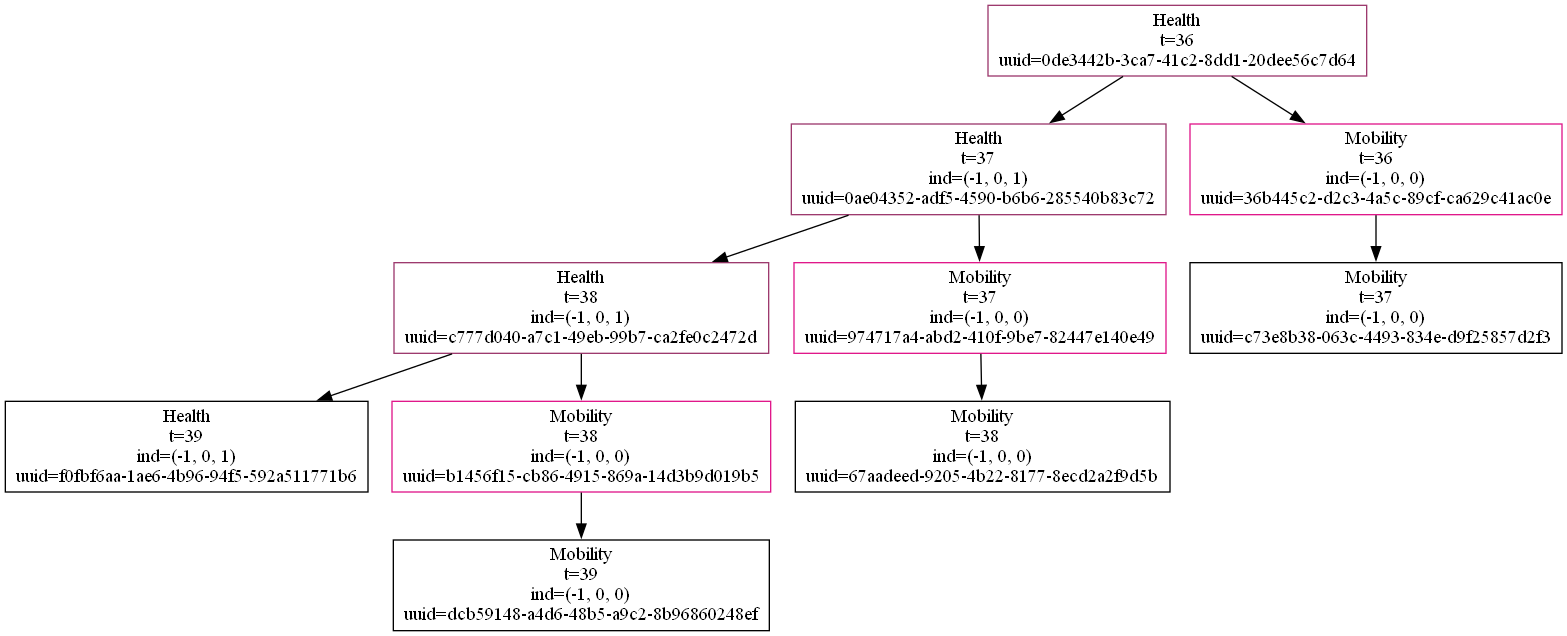

['daf9205a-3c68-4c03-a4f5-c645cc480fbd', 'fa7d76b8-42c2-45d4-a76e-d1780265fad3'] 

['His Mobility is below average next year because of his low below average Mobility the year before continously over the next 3 years.']
['His Health is below average next year because of his low below average Health the year before continously over the next 3 years.', 'His Mobility is below average in the same year because of his low below average Health in the same year continously over the next 3 years.']


In [8]:
# For confirmation 
using = 100
# print(cExamples[using])
# print(data.get_person_at_ts(cExamples[using][1], cExamples[using][0]))
# print(data.get_mean(cExamples[using][1], "Age"), data.get_mean(cExamples[using][1], "Nutrition"), data.get_mean(cExamples[using][1], "Health"), data.get_mean(cExamples[using][1], "Mobility") )
# print() 
# print(data.get_person_at_ts(cExamples[using][1]+1, cExamples[using][0]))
# print(data.get_mean(cExamples[using][1]+1, "Age"), data.get_mean(cExamples[using][1]+1, "Nutrition"), data.get_mean(cExamples[using][1]+1, "Health"), data.get_mean(cExamples[using][1]+1, "Mobility") )
# print() 
# print(data.get_person_at_ts(cExamples[using][1]+2, cExamples[using][0]))
# print(data.get_mean(cExamples[using][1]+2, "Age"), data.get_mean(cExamples[using][1]+2, "Nutrition"), data.get_mean(cExamples[using][1]+2, "Health"), data.get_mean(cExamples[using][1]+2, "Mobility") )
# print() 
# print(data.get_person_at_ts(cExamples[using][1]+3, cExamples[using][0]))
# print(data.get_mean(cExamples[using][1]+3, "Age"), data.get_mean(cExamples[using][1]+3, "Nutrition"), data.get_mean(cExamples[using][1]+3, "Health"), data.get_mean(cExamples[using][1]+3, "Mobility") )

cPerson ,cTs,  = cExamples[using]
cExpTree = interpreter.getExpTreeAnticipative(cPerson, cTs, "Health", max_depth=3)
filepath = os.path.join("tmp_img", "TSCE",  f"tssce_{getTimeAsString()}_anticipative.png")
generateTreeImageAnt(cExpTree, filepath=filepath)
display(Image(filename=filepath))

cExplanations = interpreter.getExplanationAnticipative(cExpTree)
# for cExplanation in list(cExplanations):
#     print(cExplanation)
#     print() 